# CANCER PREDECTION MODEL


# Data exploration and Data Cleaning

Importing dependencies

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_Raw_data = pd.read_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY3\cancer.csv')

In [3]:
print(df_Raw_data.shape)
df_Raw_data.head()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_Raw_data.drop(["Unnamed: 32"],axis="columns",inplace=True)
df_Raw_data.drop(["id"],axis="columns",inplace=True)

In [5]:
df_Raw_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

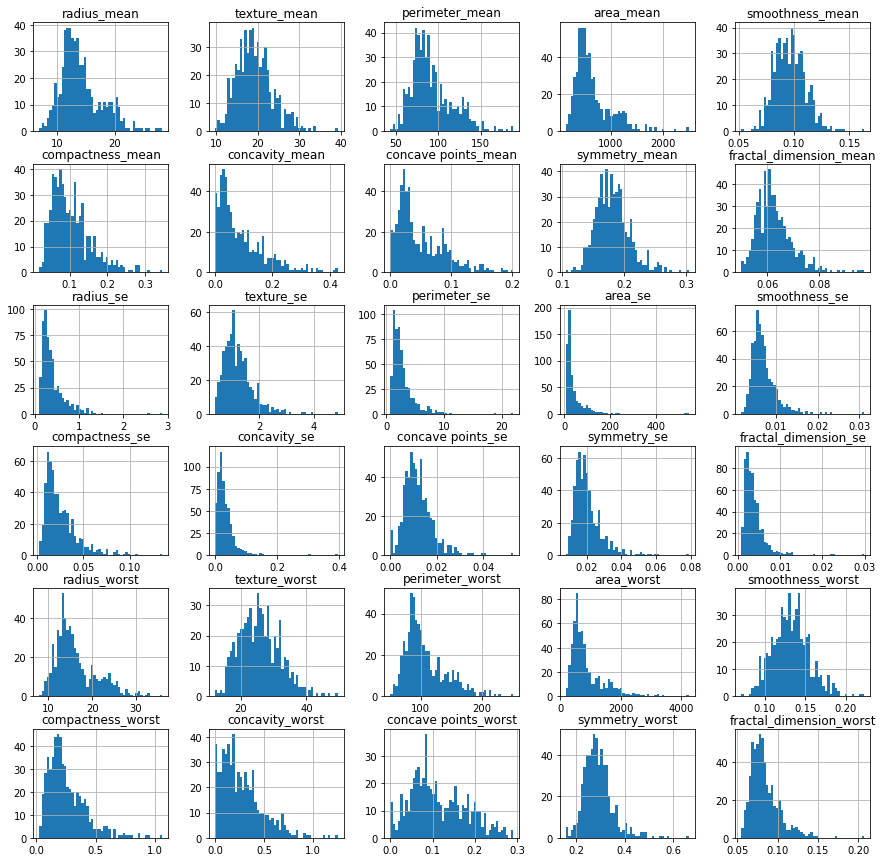

In [6]:
df_Raw_data.hist(bins=50,figsize=(15,15))

In [7]:
df_Raw_data['diagnosis'] = df_Raw_data['diagnosis'].astype('category')
df_Raw_data["diagnosis"] = df_Raw_data["diagnosis"].cat.codes
df_Raw_data.rename(columns={"diagnosis":"Malignant/Benign"},inplace=True)
df_Raw_data.head()

,Malignant/Benign,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
MetaData_CSV =df_Raw_data.to_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY3\readycancerdata.csv', index = False)

# MODELLING

In [9]:
from sklearn.linear_model import LogisticRegression
x_features = df_Raw_data.drop(['Malignant/Benign'],axis='columns')
y_labels = df_Raw_data['Malignant/Benign']

In [10]:
x_features=np.array(x_features)
y_labels=np.array(y_labels)

# LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_labels,y_test_labels = train_test_split(x_features,y_labels, test_size =.25,random_state=2) 
logreg = LogisticRegression()
logreg.fit(x_train,y_train_labels)
Y_pred = logreg.predict(x_test)

C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
logreg.score(x_test,y_test_labels)

0.9370629370629371

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test_labels, Y_pred))
rms

0.25087260300212727